<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-to-know-data" data-toc-modified-id="Getting-to-know-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting to know data</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Analyzing-missing-data" data-toc-modified-id="Analyzing-missing-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analyzing missing data</a></span></li><li><span><a href="#Analysis-by-column" data-toc-modified-id="Analysis-by-column-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis by column</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Number-of-games-released-in-different-years" data-toc-modified-id="Number-of-games-released-in-different-years-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Number of games released in different years</a></span></li><li><span><a href="#Variance-in-sales-from-platform-to-platform.-Choosing-relevant-data." data-toc-modified-id="Variance-in-sales-from-platform-to-platform.-Choosing-relevant-data.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Variance in sales from platform to platform. Choosing relevant data.</a></span></li><li><span><a href="#What-platforms-are-potentially-profitable?" data-toc-modified-id="What-platforms-are-potentially-profitable?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>What platforms are potentially profitable?</a></span></li><li><span><a href="#Global-sales-of-all-games,-broken-down-by-platform." data-toc-modified-id="Global-sales-of-all-games,-broken-down-by-platform.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Global sales of all games, broken down by platform.</a></span></li><li><span><a href="#How-user-and-professional-reviews-affect-sales" data-toc-modified-id="How-user-and-professional-reviews-affect-sales-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>How user and professional reviews affect sales</a></span></li><li><span><a href="#How-user-and-professional-reviews-affect-sales-of-the-same-game-on-different-platforms" data-toc-modified-id="How-user-and-professional-reviews-affect-sales-of-the-same-game-on-different-platforms-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>How user and professional reviews affect sales of the same game on different platforms</a></span></li><li><span><a href="#General-distribution-of-games-sales-by-genre." data-toc-modified-id="General-distribution-of-games-sales-by-genre.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>General distribution of games sales by genre.</a></span></li><li><span><a href="#Top-five-platforms-by-region" data-toc-modified-id="Top-five-platforms-by-region-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Top five platforms by region</a></span></li><li><span><a href="#Top-five-genres-by-region" data-toc-modified-id="Top-five-genres-by-region-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Top five genres by region</a></span></li><li><span><a href="#ESRB-rating-effect-on-sales-by-region" data-toc-modified-id="ESRB-rating-effect-on-sales-by-region-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>ESRB rating effect on sales by region</a></span></li></ul></li><li><span><a href="#Hypotheses-testing" data-toc-modified-id="Hypotheses-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hypotheses testing</a></span><ul class="toc-item"><li><span><a href="#Average-user-ratings-of-the-XBox-One-and-PC-platforms-are-the-same" data-toc-modified-id="Average-user-ratings-of-the-XBox-One-and-PC-platforms-are-the-same-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Average user ratings of the XBox One and PC platforms are the same</a></span></li><li><span><a href="#Average-user-ratings-of-the-Action-and-Sports-genres-are-different" data-toc-modified-id="Average-user-ratings-of-the-Action-and-Sports-genres-are-different-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Average user ratings of the Action and Sports genres are different</a></span></li></ul></li><li><span><a href="#Project-Conclusion" data-toc-modified-id="Project-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Project Conclusion</a></span></li></ul></div>

# Getting to know data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import missingno as msno
import random

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

%matplotlib inline

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('games.csv')
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Data in these columns has improper data type:
    Year_of_Release in float needs to be converted to int.
    User_Score in object needs to be converted to float.
We will investigate data column by column and we might find some other opportunities for data type change.    

Checking for duplicates:

In [4]:
df.duplicated().sum()

0

There are no duplicated rows.

# Data preparation

Converting column headers to lowercase:

In [5]:
df.columns = df.columns.str.lower()

## Analyzing missing data

Let's determine location and amount of data missing in the table. The graph below is the visual representation of the amount of data missing by a column.

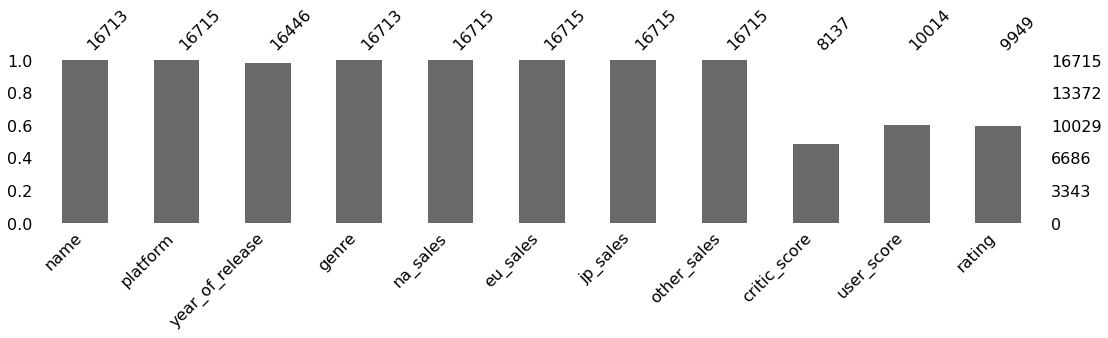

In [6]:
msno.bar(df, figsize=(18, 3));

Let's determine if there is a correlation between missing values in different columns. To do so we will use some other functions of the Missingno library. 

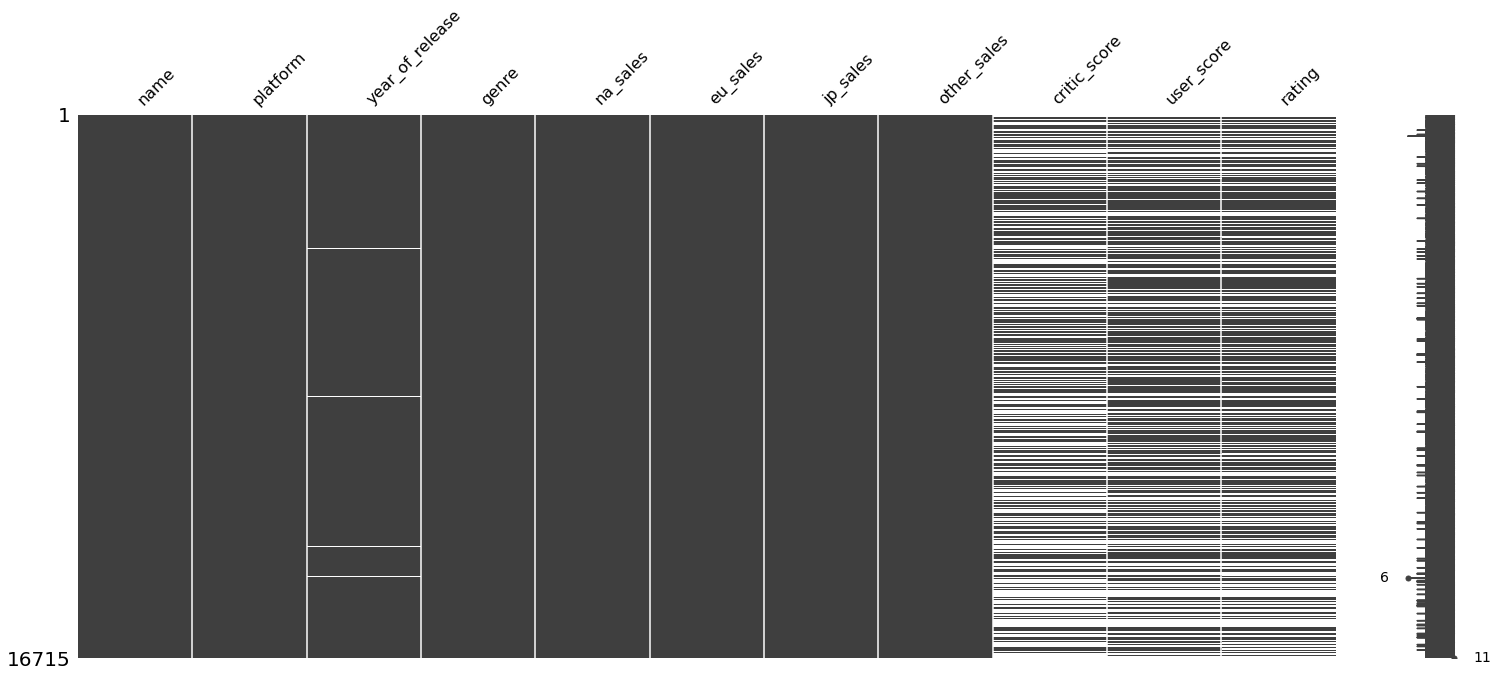

In [7]:
msno.matrix(df);

According to the graph above, there is some correlation between rows missing in the Critic Score, User Score and Rating columns, because we can see that the white lines are continuing across columns. The heat map below will tell us whether values are missing at random or there is a dependency.

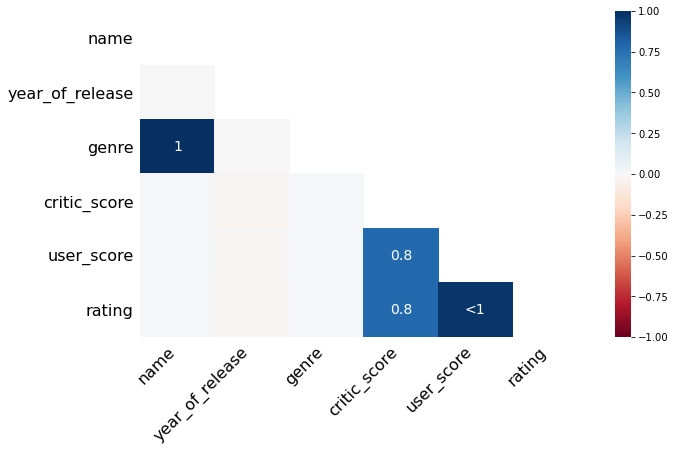

In [8]:
msno.heatmap(df, figsize=(10, 6));

We've got a very strong positive correlation between values missing in columns Genre and Name and also between the User Score - Critic Score and Rating - User Score column pairs. This suggests that if values are missing in one of the columns the other column of the pair will miss values too.

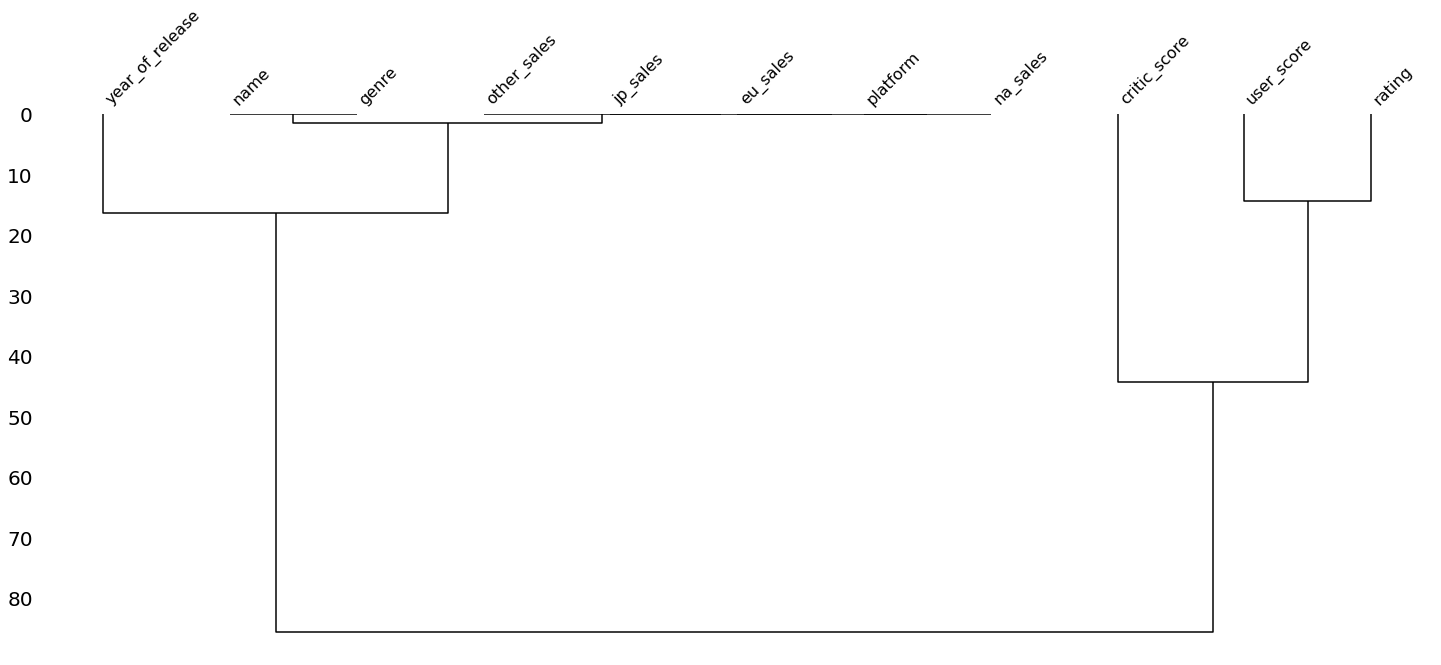

In [9]:
msno.dendrogram(df);

This dendrogram above also proves the suggestion above. We can see that there is a cluster in missing values "User Score - Rating - Critics Score" and a cluster "Name - Genre".

## Analysis by column

3.2.1 <b>name</b> Column

In [10]:
df.loc[df['name'].isnull(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The rows with missing values in the Name column also miss values in the Platform and Genre columns. The reason this info is missing is probably a data extraction error. There is no way to guess them, so we are going to drop them. On this step we will loose only 1.6% of data, with is tolerable.

In [11]:
df.dropna(subset=['name', 'platform'], inplace=True)

In [12]:
len(df.name.unique())

11559

There are 11559 unique values in the name column, which means that one name can be present in more than two columns.

In [13]:
# Getting games with the name on two or more platforms.
df.groupby(['name']).filter(lambda x: x['platform'].count() >= 2).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN


In [14]:
df.query('name == "Tetris"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
157,Tetris,NES,1988.0,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN


As we can see some of the games were released on several platforms.

3.2.2 <b>platform</b> Column

In [15]:
display(df['platform'].value_counts())

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [16]:
len(df.platform.unique())

31

There are 31 unique platforms on which games are released.

3.2.3 <b>year_of_release</b> Column

In [17]:
df.loc[df['year_of_release'].isnull(), :]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 269 rows with missing year of release value. This happened probably due to error in data export. If there is a year of release for a particular game on one platform and it is missing for the same game on another platform, we can try filling this missing value from there. 

In [18]:
games_name_group = df.groupby('name')
df['year_of_release'] = games_name_group.year_of_release.apply(
    lambda x: x.fillna(x.max()))

In [19]:
df.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


123 Records were filled in, 146 are still missing. It will not be correct to fill these 146 values with mean or median, so we are going to drop these rows.

In [20]:
df.dropna(subset=['year_of_release'], inplace=True)

Changing data type to integer.

In [21]:
df.year_of_release = df.year_of_release.apply(int)

3.2.4 <b>genre</b> Column

In [22]:
df.genre.value_counts()

Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

In [23]:
len(df.genre.unique())

12

There are 12 distinct genres in the data base.

3.2.5 - 3.2.7 <b>na_sales, eu_sales, jb_sales</b> Columns

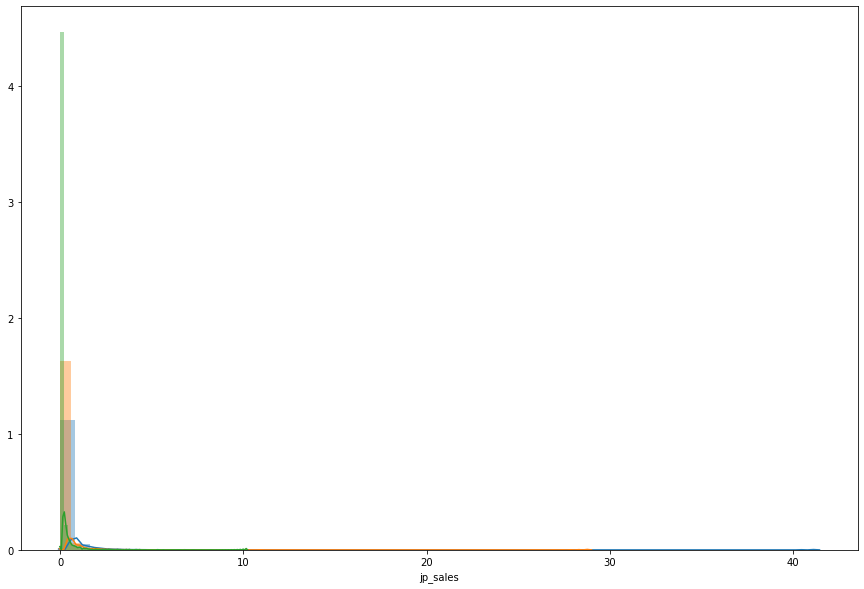

In [24]:
plt.figure(figsize=(15, 10))
# kde : bool - Whether to plot a gaussian kernel density estimate.
sns.distplot(df['na_sales'], 50, kde=True)
sns.distplot(df['eu_sales'], 50, kde=True)
sns.distplot(df['jp_sales'], 50, kde=True);
#plt.tytle("Sales Histogram by Region")

There are no missing values in these columns, but all three of them have a lot of cells with zeros. Some possible reasons are: 1) there was no sales in these regions, 2) values were rounded and the thousands were lost during data export. We cannot fill in zero values, because it will greatly distort meaning of other values, thus they will remain as is.

Creating a column with total sales across all regions in the database. 

In [25]:
df['total_sales'] = df['na_sales'] + \
    df['eu_sales'] + df['jp_sales'] + df['other_sales']

3.2.8 <b>critic_score</b> Column

In [26]:
display(df.critic_score.value_counts())

70.0    253
71.0    252
75.0    243
78.0    238
80.0    236
73.0    236
76.0    233
74.0    226
72.0    224
77.0    223
68.0    218
79.0    218
81.0    217
69.0    212
82.0    206
83.0    205
66.0    203
65.0    192
84.0    183
67.0    182
63.0    178
64.0    169
62.0    169
61.0    165
59.0    157
60.0    153
85.0    150
58.0    149
86.0    134
57.0    131
87.0    118
88.0    116
56.0    110
55.0    109
89.0    104
53.0    101
54.0     98
51.0     89
49.0     85
50.0     79
90.0     76
52.0     73
91.0     69
48.0     65
47.0     65
46.0     55
43.0     54
92.0     52
44.0     49
45.0     47
93.0     47
39.0     39
94.0     37
42.0     37
38.0     34
41.0     29
37.0     28
35.0     27
36.0     26
40.0     26
33.0     21
96.0     18
95.0     16
32.0     15
26.0     12
30.0     12
97.0     11
28.0     11
34.0      9
31.0      9
27.0      8
25.0      7
19.0      6
23.0      4
24.0      4
98.0      4
20.0      3
29.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, dtype: i

Critic Score column values are ranging from min of 13 to the max of 98. Data type is float, we will change it to int.

In [27]:
df['critic_score'] = df['critic_score'].astype('int', errors='ignore')

3.2.9 <b>user_score</b> Column

In [28]:
display(df.user_score.value_counts())

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
8.5     252
7.5     251
7.9     249
8.1     241
7.7     239
7.3     236
8.4     222
7       219
7.4     215
7.6     214
8.6     209
6.8     195
8.7     187
8.8     182
7.1     180
7.2     166
8.9     151
6.6     148
6.9     140
6.3     136
6.7     128
6       127
6.5     125
9       119
6.2     113
6.4     106
5.8      97
9.1      90
6.1      82
5.9      77
5.7      77
5.6      72
5.4      72
5.3      70
5.5      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      33
4.1      33
4.4      33
9.3      31
3.8      27
4.2      27
4        27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        21
3.7      19
3.6      18
3.3      15
3.9      13
2.5      12
3.2      12
2.4      11
2        11
9.4      11
2.1       9
1.7       9
2.9       9
2.7       8
2.2       6
9.5       5
1.4       5
1.8       5
2.6       4
1.6       3
1.2       3
1.9       2
1         2
1.3 

The range of values in the User Score column is from 0 to 10. Some values are in int type, some are in float. We will convert all to float.\
There are 6633 null values, which we will keep, because removing such a big portion of data might have a serious effect on the results of our analytics.\
Also, there are 2394 "tbd" values. The 'tbd' is an abbreviation for "to be determined" and it means that the score was being determined at the time of data export. We will replace all "tbd"'s with zeros.

In [29]:
df['user_score'] = df['user_score'].replace('tbd', 0)

In [30]:
df['user_score'] = df['user_score'].astype('float')

3.2.11 <b>rating</b> Column

In [31]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

'K-A' rating was renamed to everyone 'E' in 1998. We will replace 'K-A' with 'E' using a function. Also, we will replace NaN's with Not_Rated.

In [32]:
df['rating'].replace('K-A', 'E', inplace=True)

40% of values in this column is missing. The ESRB rating system was established in 1993. Perhaps, the reason for missing values is that there was not rating prior to year 1993 or the ESRB did not rate a particular game, or it caused by an error during the data transfer. We will filling NaN's with Not Rated string.

In [33]:
df.rating.fillna('Not_Rated', inplace=True)

## Conclusion

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<b>Summary</b>: 
- Columns headers were converted to lowercase
- Incorrect data types were successfully changed
- Two rows were dropped (less than 2% of data)
- Not-obvious duplicates in the Rating column were combined
- We are going to keep missing values in the Critic Score and User Score columns, because if we drop them we will loose significant amount of the data. We will keep it as is, because it will not affect graphs drawing.

# Data analysis

## Number of games released in different years

How many games were released in different years? Is the data for every period significant?

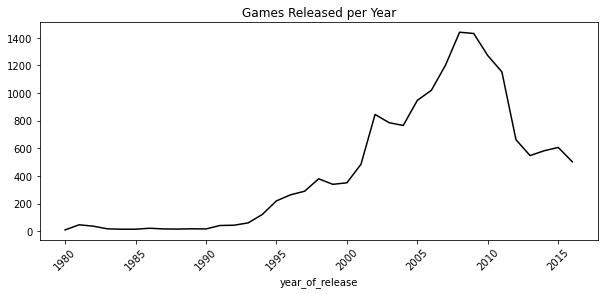

In [35]:
plt.figure(figsize=(10, 4))
df.groupby('year_of_release').year_of_release.count().plot(
    kind='line', color='black', title='Games Released per Year', rot=45)

In [36]:
df.query('year_of_release <= 1993').groupby(
    'year_of_release').year_of_release.count().mean()

26.071428571428573

Let's look at how many games were released in different years.

In [37]:
df.query('year_of_release > 1993').groupby(
    'year_of_release').year_of_release.count().mean()

704.4347826086956

We can see from the graph above that the average number of games released yearly started to pick up fast after mid-nineties. The average number of games per year for the previous 10+ years (1980-1992) is 26. After 1993 this number grows exponentially with the average being almost 700 games per year with pick of about 1400+ games in 2008. After year 2008 there is a declining trend in the number of games released per year.

## Variance in sales from platform to platform. Choosing relevant data.

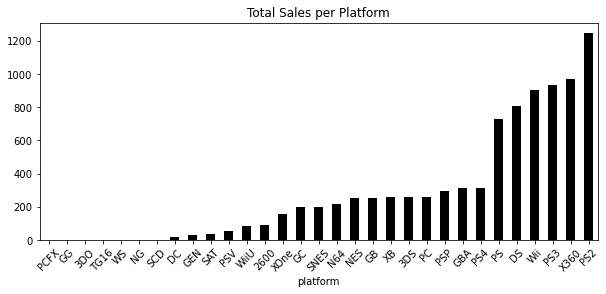

In [38]:
plt.figure(figsize=(10, 4))
df.groupby('platform').total_sales.sum().sort_values().plot(
    kind='bar', color='black', title='Total Sales per Platform', rot=45)

We can see that all time sales leader is PS2. Let's draw a graph with sales distribution for the the top ten all time sales leaders.

In [39]:
# Getting a slice of data for top ten sales leaders
top_sales_platforms = df.groupby(
    'platform').total_sales.sum().sort_values().index[-10:]

# Making a list of unique platform names in the selected slice.
top_sales_platforms = set(top_sales_platforms.to_list())

In [40]:
# Making a list of different colors for the graph
def get_colors(n): return list(map(lambda i: "#" + "%06x" %
                                   random.randint(0, 0xFFFFFF), range(n)))


colors = get_colors(len(top_sales_platforms))

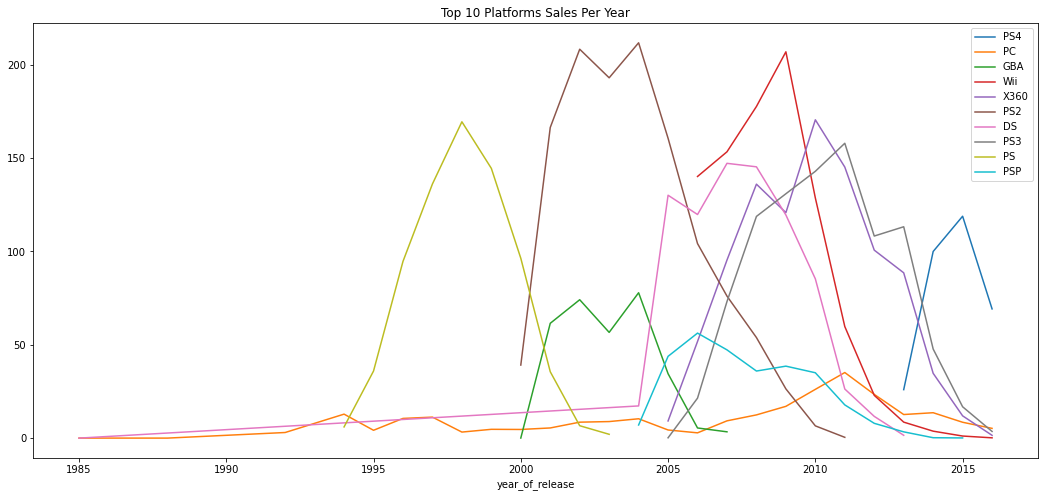

In [41]:
plt.figure(figsize=(18, 8))
# Iterate through platforms
for i, platform in enumerate(top_sales_platforms):
    # Subset to the platform
    subset = df[df['platform'] == platform]
    color = colors[i]
    # Drow the plot
    subset.groupby('year_of_release').total_sales.sum().plot(
        label=platform, title='Top 10 Platforms Sales Per Year')
plt.legend(loc="upper right")

From the graph above we can see that the average period for the platform to generate revenue is about 8 years, half of which sales are growing and another half they are declining. We should disregard data for platforms, which are no longer active. In our opinion the most optimum decision would be to select data from 2012 to 2016 to work with in order to build prognosis for 2017.

In [42]:
filtered_df = df[df.year_of_release >= 2012]

## What platforms are potentially profitable?

Now we are going to plot another graph to see the data only for the last five years.

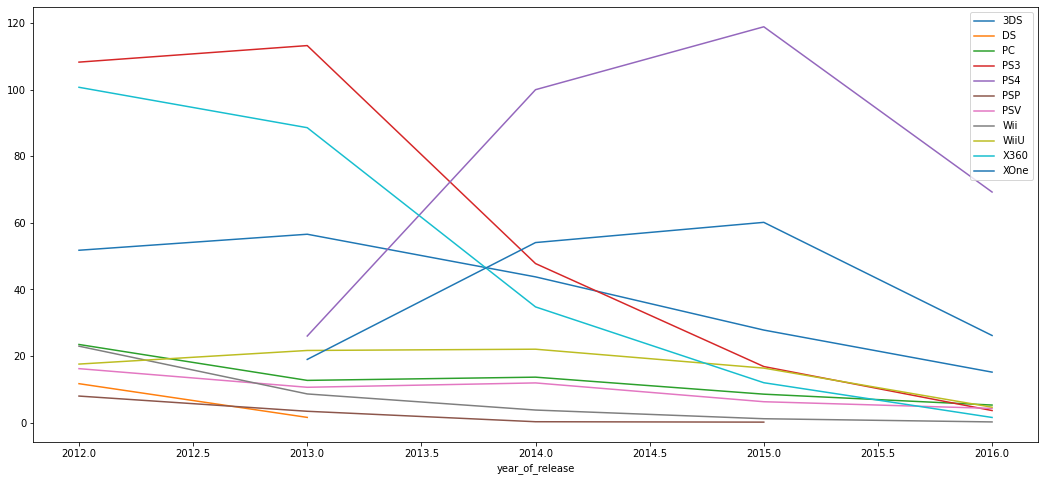

In [43]:
# Making a table "Sales Revenue by Years"
platform_sales = filtered_df.pivot_table(index=['platform', 'year_of_release'],
                                         values='total_sales',
                                         aggfunc='sum').unstack(0).droplevel(0, axis=1)
# Drawing a graph
platform_sales.plot(figsize=(18, 8))
plt.title('')
plt.legend(loc="upper right")

We can see that by the end of 2016 the most sales potential has PS4 platform, followed by XOne and DS. Platforms such as PC, WiiU, PS3X360 and PSV are shrinking in sales.

## Global sales of all games, broken down by platform.

Now let's build a boxplot graph on the selected slice of data for the global sales of all games broken down by platform.

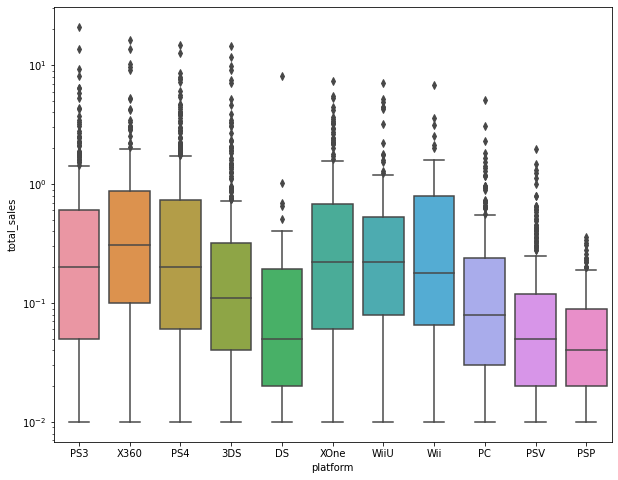

In [44]:
# Using logarithmic scale for better visibility
plt.figure(figsize=(10, 8))
sns.boxplot(data=filtered_df, x='platform', y='total_sales')
plt.yscale('log')

We see that the X360 has the maximum median sales, whereas the PSP platform has minimum median sales. Almost all platforms have outliers - games that were very successful.

## How user and professional reviews affect sales

To analyze how both user and critics score affect sales we are going to use data for the platform PS4, which is leading in sales in the selected time range: 2012-2016. Let's build a scatter plots for user score and critics score vs. total sales.

Text(0.5, 1.0, 'Total Sales vs Use Score')

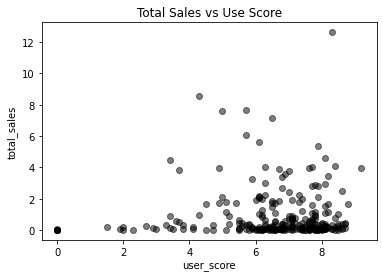

In [45]:
plt.scatter(filtered_df[filtered_df.platform == 'PS4']['user_score'],
            filtered_df[filtered_df.platform == 'PS4']['total_sales'], color='black', alpha=.5)
plt.xlabel('user_score')
plt.ylabel('total_sales')
plt.title('Total Sales vs Use Score')

Looks like there is a very-very weak positive (almost non-existent) correlation, but there are also some outliers so we probably need to take a look at the correlation coefficient. 

Text(0.5, 1.0, 'Total Sales vs Critic Score')

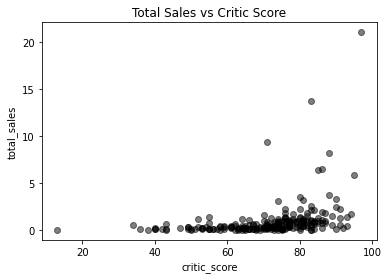

In [46]:
plt.scatter(filtered_df[filtered_df.platform == 'PS3']['critic_score'],
            filtered_df[filtered_df.platform == 'PS3']['total_sales'], color='black', alpha=.5)
plt.xlabel('critic_score')
plt.ylabel('total_sales')
plt.title('Total Sales vs Critic Score')

Similar situation here, although, here there are not that many outliers in the middle, so the correlation is stronger than in the first graph.

In [47]:
filtered_df[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.504348,0.097742
critic_score,0.504348,1.000000,0.307951
total_sales,0.097742,0.307951,1.000000


Judging by the correlation coefficients we can conclude that the user rating doesn't really affect much the total sales amount. There is a more dependency between the critic score and sales revenue, which tells that consumers tend to trust professional reviews more than amateur reviews.

## How user and professional reviews affect sales of the same game on different platforms

Let's identify what games are sold on more than one platform.

In [48]:
name_platform = filtered_df.groupby(['name']).filter(
    lambda x: x['platform'].count() >= 2)
name_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not_Rated,14.63
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,0.0,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not_Rated,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not_Rated,0.01


For the analysis we will choose the Call of Duty: Black Ops II game, which was sold in 2012 on four platforms, and has the rating information.

In [49]:
call_of_duty = name_platform.query('name == "Call of Duty: Black Ops II"')
call_of_duty

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M,1.52
4706,Call of Duty: Black Ops II,WiiU,2012,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M,0.41


In [50]:
call_of_duty[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.451616,-0.306246
critic_score,0.451616,1.000000,0.700860
total_sales,-0.306246,0.700860,1.000000


Again, we can observe the same tendency: users reviews do not affect sales. In fact, the correlation coefficient is even negative. On another hand, critics reviews affect sales: the higher the critics reviews the higher the sales will be regardless of the platform where a game is being sold.

## General distribution of games sales by genre.

In [51]:
filtered_df.groupby('genre')[['total_sales']].sum().sort_values(
    'total_sales', ascending=False).style.bar()

,total_sales
genre,
Action,446.410000
Shooter,304.750000
Role-Playing,192.800000
Sports,181.070000
Misc,85.280000
Platform,61.000000
Racing,53.500000
Fighting,44.490000
Simulation,35.120000


The most profitable genre is action, followed by shooter and role-playing genres. Players do not spend much on games of puzzle, strategy and adventure genres. If we would to generalize revenue distribution by genre, immersive games are the ones that users spend a lot on. Games that require concentration and intellectual activity are least profitable. On the other hand, action games are more expensive to develop too, so maybe that is why they cost more to begin with.

<a class="anchor" id="4">4. User Profile for Each Region</a>

Let's create a user profile for each region that we have information about: the North America, the Europe and Japan.

In [52]:
revenue_region = filtered_df.pivot_table(
    index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

In [53]:
revenue_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.83,87.79,55.49
DS,3.78,3.72,4.93
PC,38.38,0.00,19.26
PS3,107.27,35.29,103.74
PS4,141.09,15.96,108.74
PSP,0.52,10.71,0.23
PSV,11.36,21.04,10.98
Wii,12.34,3.39,18.14
WiiU,25.13,13.01,38.10


Text(0.5, 1.0, 'All platfors by region')

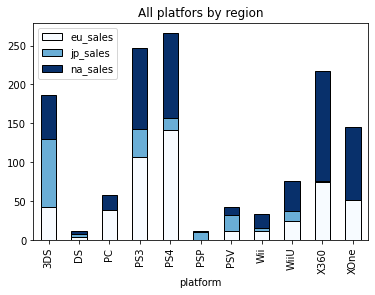

In [54]:
revenue_region.plot(kind='bar', stacked=True, cmap="Blues", ec='black', linewidth=1)
plt.title('All platfors by region')

We can see from the bar chart above that sales revenue for each platform differs from region to region. In other words, some platforms are more popular in one region and less popular in another. Let's find top five popular platforms in Europe, Japan and North America. 

## Top five platforms by region

In [55]:
eu_platforms = revenue_region['eu_sales'].nlargest(5)
jp_platforms = revenue_region['jp_sales'].nlargest(5)
na_platforms = revenue_region['na_sales'].nlargest(5)

In [56]:
# A list of the most popular platforms in the three regions
platforms_list = set(eu_platforms.index.to_list(
) + jp_platforms.index.to_list() + na_platforms.index.to_list())
list(platforms_list)

['PSV', 'XOne', 'PS4', 'WiiU', 'X360', 'PS3', '3DS']

In [57]:
# Assigning a distinct color to each platform
colors = get_colors(len(platforms_list))
colors_dict = {}
for key in platforms_list:
    for value in colors:
        colors_dict[key] = value
        colors.remove(value)
        break

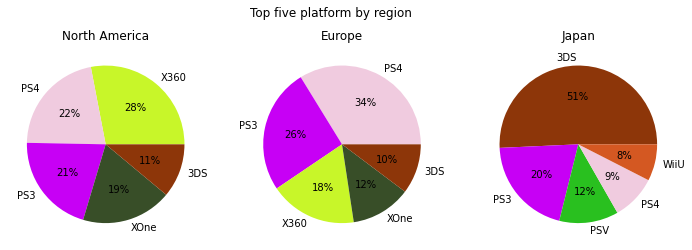

In [58]:
# Drawing a pie chart for top five platforms in each region
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

fig.suptitle('Top five platform by region')

ax1.pie(na_platforms, labels=na_platforms.index, autopct='%1.f%%',
        colors=[colors_dict[key] for key in na_platforms.index])
ax2.pie(eu_platforms, labels=eu_platforms.index, autopct='%1.f%%',
        colors=[colors_dict[key] for key in eu_platforms.index])
ax3.pie(jp_platforms, labels=jp_platforms.index, autopct='%1.f%%',
        colors=[colors_dict[key] for key in jp_platforms.index])

ax1.title.set_text('North America')
ax2.title.set_text('Europe')
ax3.title.set_text('Japan')

plt.show()

The most obvious conclusion here is that Japan's most popular platform is only number five in the North America and Europe. Also platforms WiiU and PSV, that are quite popular in Japan, are not in the top five list for the North America and the Europe. The Europe and the North America are rather more similar to each other in users preferences, than they are to Japan.

## Top five genres by region

In [59]:
na_genres = filtered_df.groupby('genre').na_sales.sum().nlargest(5)
eu_genres = filtered_df.groupby('genre').eu_sales.sum().nlargest(5)
jp_genres = filtered_df.groupby('genre').jp_sales.sum().nlargest(5)

In [60]:
genres_list = set(eu_genres.index.to_list() + jp_genres.index.to_list() + na_genres.index.to_list())

In [61]:
# Creating a dictionary to assign a unique color to each platform 
colors = get_colors(len(genres_list))
colors_dict = {}
for key in genres_list:
    for value in colors:
        colors_dict[key] = value
        colors.remove(value)
        break

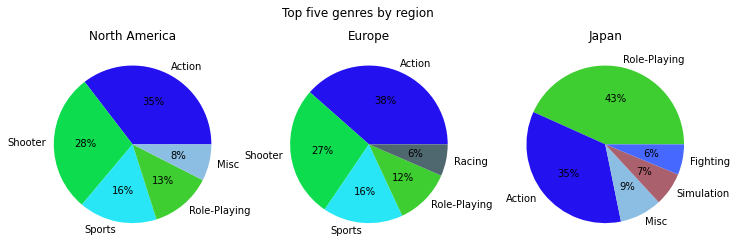

In [62]:
# Drawig a pie chart
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

fig.suptitle('Top five genres by region')

ax1.pie(na_genres, labels=na_genres.index, autopct='%1.f%%',
        colors=[colors_dict[key] for key in na_genres.index])
ax2.pie(eu_genres, labels=eu_genres.index, autopct='%1.f%%',
        colors=[colors_dict[key] for key in eu_genres.index])
ax3.pie(jp_genres, labels=jp_genres.index, autopct='%1.f%%',
        colors=[colors_dict[key] for key in jp_genres.index])


ax1.title.set_text('North America')
ax2.title.set_text('Europe')
ax3.title.set_text('Japan')

plt.show()

Genre preferences vary by a region. Player in the North America and Europe have similar preferences: they like action, shooter and sports the most. Japanese players' favourite genre is role-playing, their second preference is action, but in contrast with their counterparts in EU and North America, they don't like shooter as much, they also like fighting genre, which is not in top five most preferred in the Europe and North America. The Japanese players also prefer the music genre, which is not EU's and North America's top five preferred genres list.

## ESRB rating effect on sales by region

In [63]:
na_rating = filtered_df.groupby('rating').na_sales.sum().nlargest(6)
jp_rating = filtered_df.groupby('rating').jp_sales.sum().nlargest(6)
eu_rating = filtered_df.groupby('rating').eu_sales.sum().nlargest(6)

In [64]:
top_rating = pd.concat([pd.concat([na_rating, eu_rating], axis = 1), jp_rating], axis = 1)

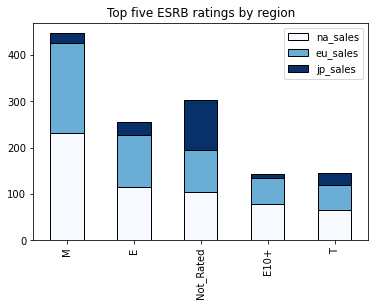

In [65]:
top_rating.plot(kind='bar', stacked=True, cmap="Blues", ec='black', linewidth=1)
plt.title('Top five ESRB ratings by region');

There is a big amount of data in the rating column with missing values, which we decided to show as Not Rated. Unfortunately, we cannot guess what it is, although this information would be very interesting since this is top popular rating in Japan.<br>
Based on the data we have we can make a conclusion that in the Europe and the North America the top consumer of video games is mature audience, because the top rating is M.<br>
In Japan the top consumers are teenagers (ages 13 y.o. to 19 y.o.), since the most popular rating is "T". 

# Hypotheses testing

## Average user ratings of the XBox One and PC platforms are the same

Let's formulate the null and the alternative hypotheses.<br>
Ho : m1 = m2 (the mean user ratings of the XBox One platform is equal to the mean user rating of the PC platform)<br>
Ha : m1 <> m2 (the mean user ratings of the XBox One platform is NOT equal to the mean user rating of the PC platform)

We will set the significance level to 5%, because we believe it will be appropriate for this subject of analysis.

In [66]:
# Setting the statistical significance level:
alpha = .05

In [67]:
filtered_df.groupby('platform').user_score.describe().loc[['XOne', 'PC']]

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
XOne,193.0,6.149741,2.023717,0.0,5.5,6.6,7.4,9.2
PC,216.0,6.296296,1.904483,0.0,5.4,6.8,7.7,9.3


Let's find variances as well to see which parameter to use in the test.

In [68]:
filtered_df.query('platform == "XOne"').user_score.var()

4.0954296200345395

In [69]:
filtered_df.query('platform == "PC"').user_score.var()

3.6270559862187732

We can see that the variances of two populations are quite different, so we will set the "equal variance" parameter to False.

In [70]:
result1 = st.ttest_ind(filtered_df.query('platform == "XOne"').user_score.dropna(), 
                      filtered_df.query('platform == "PC"').user_score.dropna(), 
                      equal_var=False)

In [71]:
result1

Ttest_indResult(statistic=-0.7516967626750201, pvalue=0.45268092905166846)

In [72]:
result1.pvalue < alpha

False

We cannot reject the null hypothesis. There is 45% probability of randomly getting different average user score on these two platforms. This probability is clearly too high to conclude that the average user ratings on the Xbox One and PC are the same.

## Average user ratings of the Action and Sports genres are different

Let's formulate the null and the alternative hypotheses.<br>
Ho : m1 = m2 (the mean user ratings of the Action genre is equal to the mean user rating of Sports genre)<br>
Ha : m1 <> m2 (the mean user ratings of the Action genre is NOT equal to the mean user rating for Sports genre)

In [73]:
filtered_df.groupby('genre').user_score.describe().loc[['Action', 'Sports']]

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,581.0,6.246127,2.323717,0.0,5.600,7.0,7.8,9.1
Sports,214.0,4.971495,2.274368,0.0,3.725,5.6,6.7,8.8


In [74]:
filtered_df.query('genre == "Action"').user_score.var()

5.399661700991151

In [75]:
filtered_df.query('genre == "Sports"').user_score.var()

5.172751744109515

We will set the significance level to 5% and set assume equal variances.

In [76]:
# Setting the statistical significance level:
alpha2 = .05

In [77]:
result2 = st.ttest_ind(filtered_df.query('genre == "Action"').user_score.dropna(), filtered_df.query('genre == "Sports"').user_score.dropna(), equal_var=True)

In [78]:
result2

Ttest_indResult(statistic=6.8988691289562905, pvalue=1.0722304633966983e-11)

In [79]:
result2.pvalue < alpha2

True

The data provides sufficient evidence, given the the significance level we selected, to reject the null hypothesis. Therefore we can conclude that the average user score for the Action and Sports genre are the same.

# Project Conclusion

<b>1. Getting to Know Data</b>

We got familiar with the data. Looked at the general information and observed data type discrepancy.

<b>2. Data Preparation</b>

At this step we handled some missing values, changed data types and replaced "tbd" in the User Score column with zeros.<br>
We decided to keep a lot of missing values as is in order to preserve as much data as possible.<br>
Also, we added Total Sales column to the data, which was comprised of sales data in the three given regions.

<b>3. Data Analysis</b>

- The database has 36 years of data on video games sales in the three given regions. For almost a decade: from the eighties to the earlier nineties video games development was insignificant. It started to pick up quickly in the mid-nineties, growing at a fast rate and reached peak in 2008-2009 years. The average life span of a platform is about 8 years.
- We found that not all data in the dataset is significant for the analysis and created a slice of data for the last four years only: from 2012 to 2016. For the selected period the sales for the platform are on the declining trend. There are still some games that have sales potential in the 2017 year, they are: the PS4 platform (the most potential), followed by XOne and DS. Platforms such as PC, WiiU, PS3X360 and PSV are shrinking in sales.
- Almost all platform have games that were successful in sales.
- Critics reviews have some influence over sales revenue. Users reviews do not affect sales.
- The most profitable genre is action, followed by shooter and role-playing genres. Players do not spend much on games of puzzle, strategy and adventure genres. If we would to generalize revenue distribution by genre, immersive games are the ones that users spend a lot on. Games that require concentration and intellectual activity are least profitable. On the other hand, action games are more expensive to develop too, so maybe that is why they cost more to begin with.


<b>User Profile for Each Region</b>

- The most obvious conclusion here is that Japan's most popular platform is only number five in the North America and Europe. Also platforms WiiU and PSV, that are quite popular in Japan, are not in the top five list for the North America and the Europe. The Europe and the North America are rather more similar to each other in users preferences, than they are to Japan.
- Genre preferences vary by a region. Player in the North America and Europe have similar preferences: they like action, shooter and sports the most. Japanese players' favorite genre is role-playing, their second preference is action, but in contrast with their counterparts in EU and North America, they don't like shooter as much, they also like fighting genre, which is not in top five most preferred in the Europe and North America. The Japanese players also prefer the music genre, which is not EU's and North America's top five preferred genres list.

<b>Hypotheses Testing</b>

Average user ratings of the XBox One and PC platforms are the same. The hypothesis was not confirmed.<br>
Average user ratings of the Action and Sports genres are different. The hypothesis was confirmed.
